Installation of packages

In [9]:
# nltk.download('punkt_tab')

In [ ]:
# !pip install pandas
# !pip install nltk tensorflow 
# !pip install matplotlib
# %pip install wordcloud scikit-learn
# Step 2: Reinstall scipy and scikit-learn
# %pip install --force-reinstall scipy scikit-learn

# # Step 3: Reinstall wordcloud
# %pip install --force-reinstall wordcloud

# %pip install gensim

# %pip uninstall numpy -y
# %pip install numpy==1.26.0

# %pip install spacy
# !python -m spacy download en_core_web_sm
# %pip install seaborn
# %pip install sumy
# %pip install torch
# %pip install transformers
# %pip install tf-keras
%pip install transformers[torch]


# Part 2 - Tokenization, Lemmatization & Stop words removal
In this part we tokenize and lemmatize the words and then save them on a new file (this part only runs one time)

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (if not already installed)
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

def preprocess_text(text):
    # Convert to string if not already
    text = str(text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stop words removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    return ' '.join(tokens)

def preprocess_csv(file_name):
    # Read the input CSV file
    df = pd.read_csv(file_name)
    
    # Check if the 'cleaned_description' column exists
    if 'cleaned_description' not in df.columns:
        print(f"'cleaned_description' column not found in {file_name}")
        return
    
    # Convert 'cleaned_description' column to string type
    df['cleaned_description'] = df['cleaned_description'].astype(str)
    
    # Apply preprocessing to the 'cleaned_description' column
    df['processed_description'] = df['cleaned_description'].apply(preprocess_text)
    
    # Save the results to a new CSV file
    output_file_name = 'processed_' + file_name
    df.to_csv(output_file_name, index=False)
    print(f"Preprocessed data saved to {output_file_name}")

if __name__ == "__main__":
    file_name = "cleaned_nationalreview_posts.csv"
    preprocess_csv(file_name)

Preprocessed data saved to processed_cleaned_nationalreview_posts.csv


Part 3 - Tf-IDF

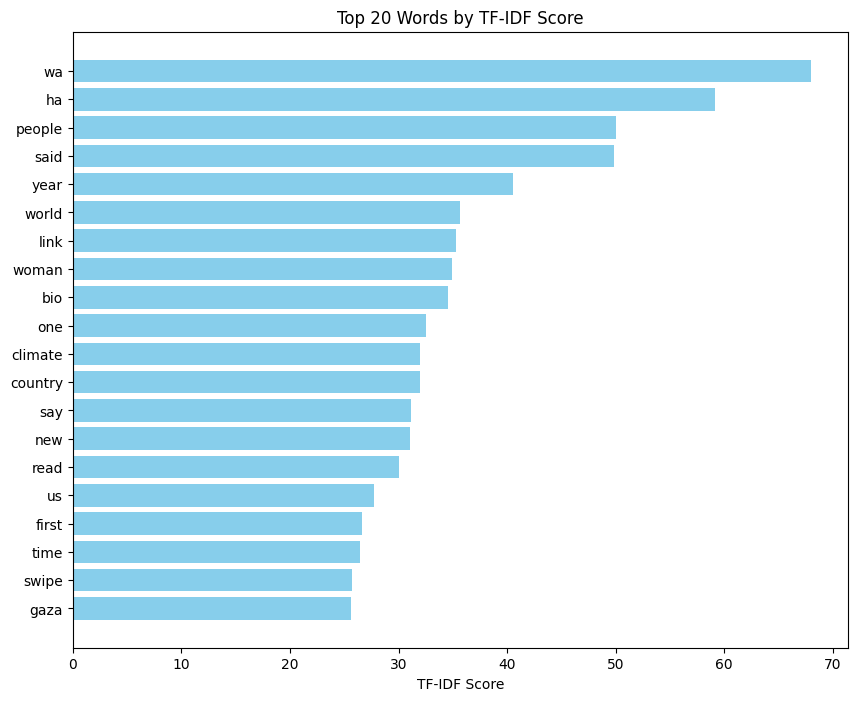

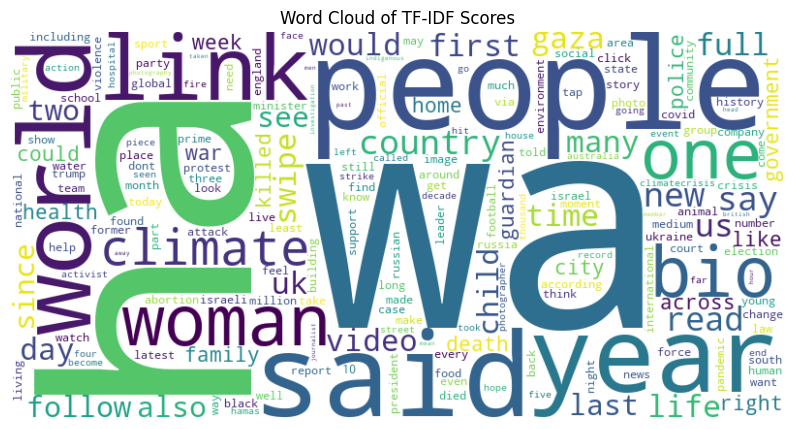

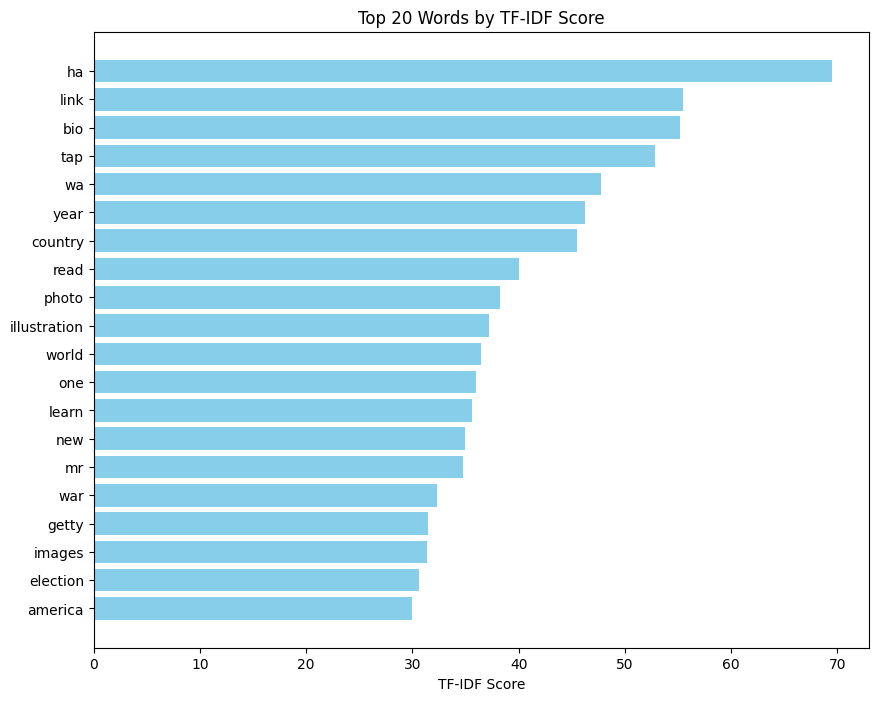

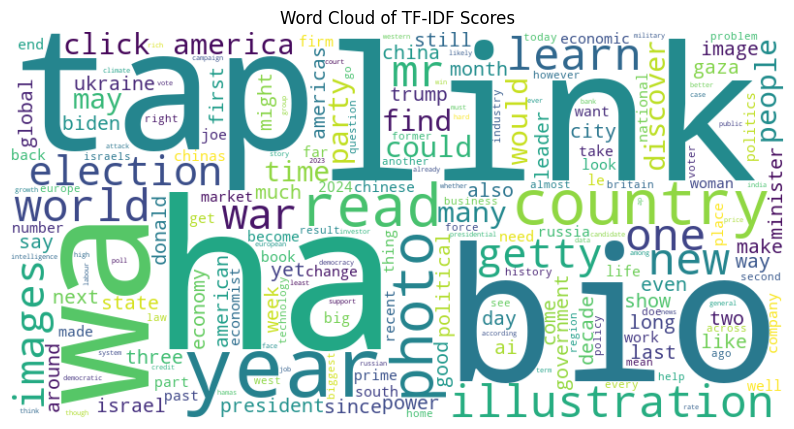

In [2]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def compute_tfidf(df):
    stop_words = list(set(stopwords.words('english')))

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(df['processed_description'].dropna())

    # Get feature names and scores
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1
    tfidf_scores = dict(zip(feature_names, scores))

    return tfidf_scores


# Function to plot bar chart
def plot_bar_chart(tfidf_scores):
    sorted_scores = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20]
    words, scores = zip(*sorted_scores)

    plt.figure(figsize=(10, 8))
    plt.barh(words, scores, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title('Top 20 Words by TF-IDF Score')
    plt.gca().invert_yaxis()
    plt.show()


# Function to plot word cloud
def plot_word_cloud(tfidf_scores):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of TF-IDF Scores')
    plt.show()


def displayPlot(file_name):
    # Read the preprocessed CSV file
    df = pd.read_csv(file_name)

    if 'processed_description' not in df.columns:
        print(f"'processed_description' column not found in {file_name}")
        return

    # Compute TF-IDF
    tfidf_scores = compute_tfidf(df)

    # Plot bar chart
    plot_bar_chart(tfidf_scores)

    # Plot word cloud
    plot_word_cloud(tfidf_scores)


# Example usage
file_name = 'processed_cleaned_guardian_posts.csv'
displayPlot(file_name)
file_name = 'processed_cleaned_theeconomist_posts.csv'
displayPlot(file_name)

# Word2Vec

In [3]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from collections import Counter

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)


# Function to train Word2Vec and find most common words
def train_word2vec(df):
    # Tokenize the processed descriptions
    sentences = df['processed_description'].dropna().apply(tokenize_text).tolist()

    # Train Word2Vec model
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    return model, sentences


# Function to find the most common words
def find_most_common_words(sentences):
    # Flatten the list of sentences to count word frequencies
    all_words = [word for sentence in sentences for word in sentence]
    word_freq = Counter(all_words)

    return word_freq


# Main function
def frequentWords(file_name):
    # Read the preprocessed CSV file
    df = pd.read_csv(file_name)

    if 'processed_description' not in df.columns:
        print(f"'processed_description' column not found in {file_name}")
        return

    # Train Word2Vec model
    model, sentences = train_word2vec(df)

    # Find most common words
    word_freq = find_most_common_words(sentences)

    # Print the most common words
    for word, freq in word_freq.most_common(20):
        print(f'{word}: {freq}')


# Example usage
file_name = 'processed_cleaned_guardian_posts.csv'
frequentWords(file_name)
file_name = 'processed_cleaned_theeconomist_posts.csv'
frequentWords(file_name)

wa: 3047
ha: 2610
said: 2066
people: 1678
year: 1377
link: 1207
bio: 1171
one: 957
say: 897
country: 869
woman: 830
world: 825
read: 757
first: 727
time: 713
US: 645
also: 631
would: 601
climate: 600
life: 592
link: 2457
bio: 2435
ha: 2004
Tap: 1585
wa: 1053
year: 1016
Photo: 978
country: 925
read: 828
learn: 753
Illustration: 700
one: 642
Mr: 636
world: 622
Getty: 619
Images: 614
new: 520
war: 507
would: 498
America: 497


# Part 5 - Autoencoder

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Function to preprocess text: tokenize and remove stop words
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)


# Function to build and train an autoencoder
def build_and_train_autoencoder(X, encoding_dim):
    input_dim = X.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)

    encoder = Model(inputs=input_layer, outputs=encoded)
    return encoder


# Function to identify the most important words using the trained autoencoder
def identify_important_words(encoder, vectorizer, feature_names):
    encoded_weights = encoder.get_weights()[0]
    word_importance = np.sum(encoded_weights, axis=1)
    important_words = sorted(zip(feature_names, word_importance), key=lambda x: x[1], reverse=True)
    return important_words


# Main function
def main(file_name):
    # Read the preprocessed CSV file
    df = pd.read_csv(file_name)

    if 'processed_description' not in df.columns:
        print(f"'processed_description' column not found in {file_name}")
        return

    # Preprocess the descriptions
    df['processed_description'] = df['processed_description'].apply(preprocess_text)

    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['processed_description'].dropna())
    X = X.toarray()
    feature_names = vectorizer.get_feature_names_out()

    # Build and train the autoencoder
    encoding_dim = 100  # Dimension of the encoded representation
    encoder = build_and_train_autoencoder(X, encoding_dim)

    # Identify the most important words
    important_words = identify_important_words(encoder, vectorizer, feature_names)

    # Print the top 20 most
    print("The 20 most important in " + file_name + "words are:")
    for word, importance in important_words[:20]:
        print(f"{word}: {importance}")

# Example usage
file_name = 'processed_cleaned_theeconomist_posts.csv'
main(file_name)
file_name = 'processed_cleaned_guardian_posts.csv'
main(file_name)


The 20 most important in processed_cleaned_theeconomist_posts.csvwords are:
science: 14.922341346740723
explains: 14.855331420898438
explain: 14.55738639831543
geopolitics: 14.355768203735352
us: 14.29719066619873
photos: 14.294845581054688
correspondent: 14.235421180725098
read: 14.066625595092773
click: 13.989723205566406
swipe: 13.956852912902832
editor: 13.873518943786621
bio: 13.737338066101074
find: 13.734792709350586
link: 13.731307983398438
uselection: 13.712132453918457
culture: 13.664355278015137
illustration: 13.649574279785156
language: 13.648101806640625
tap: 13.576141357421875
book: 13.343026161193848
The 20 most important in processed_cleaned_guardian_posts.csvwords are:
swipe: 14.394071578979492
favourite: 13.720755577087402
tip: 13.64909553527832
full: 13.302240371704102
bio: 13.246164321899414
read: 13.231284141540527
follow: 13.22354793548584
sport: 13.19271469116211
link: 13.161726951599121
writer: 13.139198303222656
moment: 13.12691879272461
photography: 13.1248617

# Part 6 - Comparison of results
We can see that the difference between TF-IDF is just the importance of said vs. people, in TF IDF people has a higher importance meanwhile word2vec puts said in a higher importance.

For Autoencoder the differences are bigger as none of the previous words even get to the top 5, We are assuming it is because the autoencoder actually tries to capture the words which are most important to understand the text and less so the words that are most common in the text.

# Part 7 - NER and categorization of text


In [5]:
import pandas as pd
import random
import spacy

# Load the spaCy model for NER
nlp = spacy.load('en_core_web_sm')


# Function to run NER on a given text
def run_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]


# Function to randomly choose 10 statements and run NER on each
def ner_on_random_statements(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    if 'cleaned_description' not in df.columns:
        print(f"'cleaned_description' column not found in {file_name}")
        return

    # Drop any NaN values in the 'processed_description' column
    descriptions = df['cleaned_description'].dropna().tolist()

    # Randomly choose 10 statements
    random_statements = random.sample(descriptions, 10)

    # Run NER on each statement and display the results
    for i, statement in enumerate(random_statements):
        print(f"Original Statement {i + 1}: {statement}")
        ner_result = run_ner(statement)
        print("NER Result:")
        for ent_text, ent_label in ner_result:
            print(f" - {ent_text}: {ent_label}")
        print("-" * 80)


# Example usage
file_name = 'processed_cleaned_guardian_posts.csv'
ner_on_random_statements(file_name)
file_name = 'processed_cleaned_theeconomist_posts.csv'
ner_on_random_statements(file_name)

Original Statement 1: This discovery made it one of the happiest days of lockdown

A new species of dinosaur with an extremely large nose has been identified by a retired GP who spent lockdown rummaging through boxes of ancient bones

Jeremy Lockwood who is studying for a PhD at the University of Portsmouth set himself the task of cataloguing every bone from an iguanodon  a type of dinosaur  discovered on the Isle of Wight

As he sorted the bones from the collections of the Natural History Museum in London and the Dinosaur Isle museum on the Isle of Wight he discovered a specimen with a unique bulbous nasal bone

After four years of unpacking and studying boxes of bones he began reconstructing the skull of a specimen that had been in storage since 1978 and found several striking features that set it apart

The number of teeth was a sign Lockwood said Mantellisaurus has 23 or 24 but this has 28 It also had a bulbous nose whereas the other species have very straight noses Altogether thes

# Part 8 - EDA

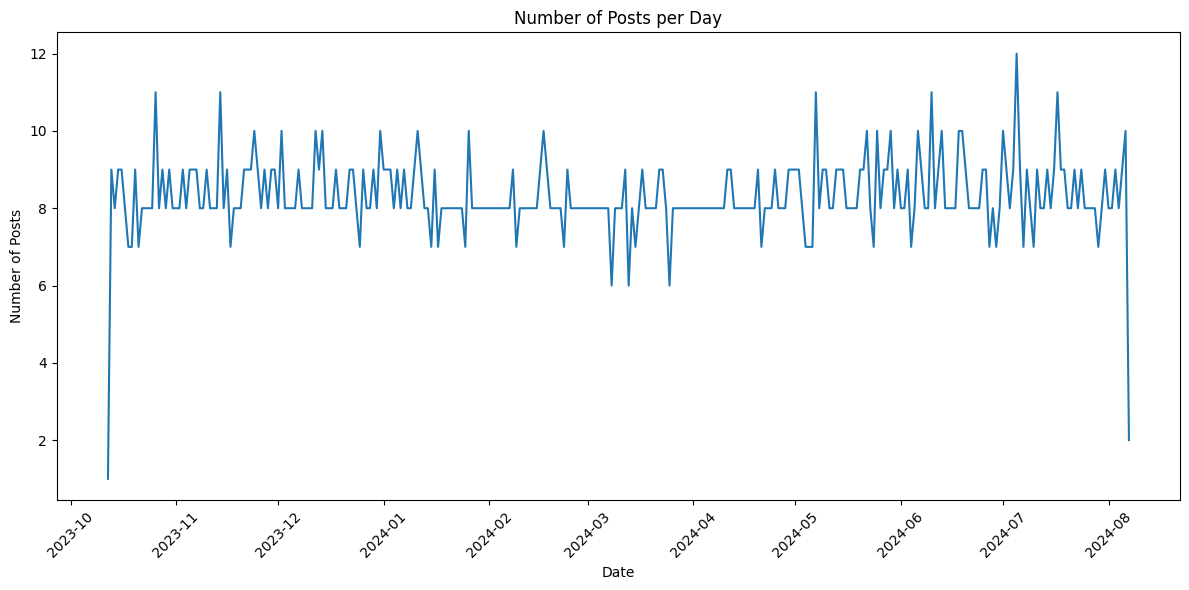

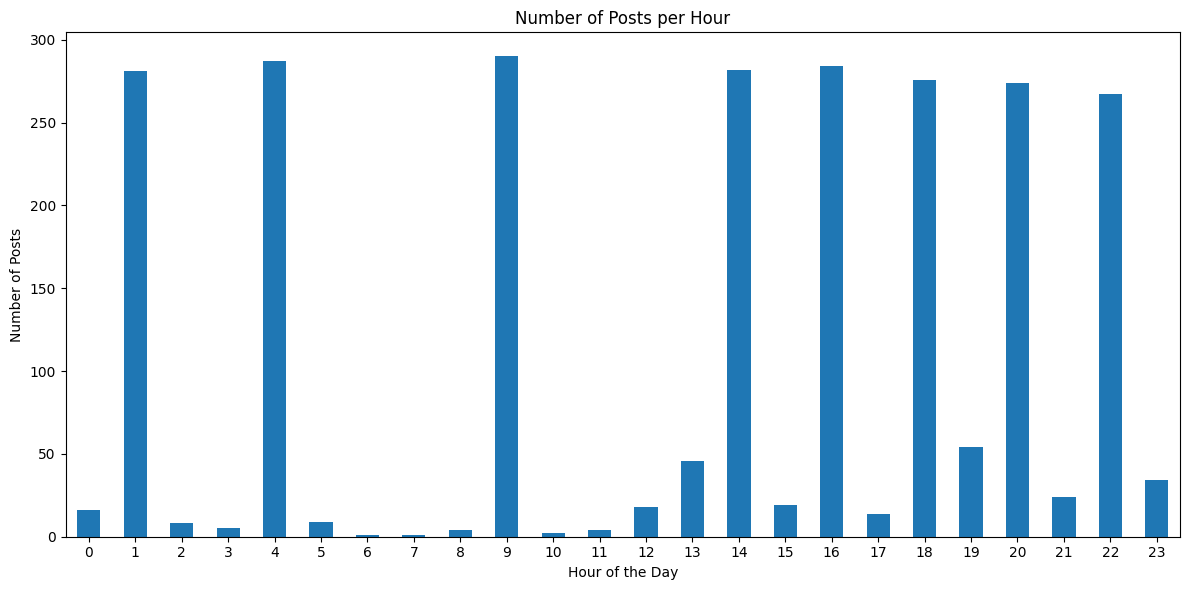

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\966440503.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


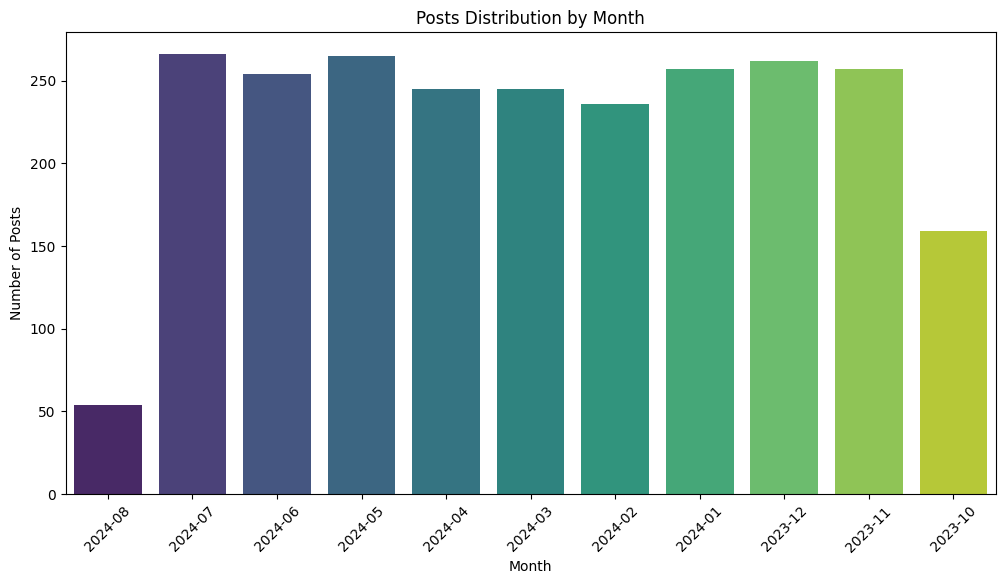

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\966440503.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='week', palette='viridis')


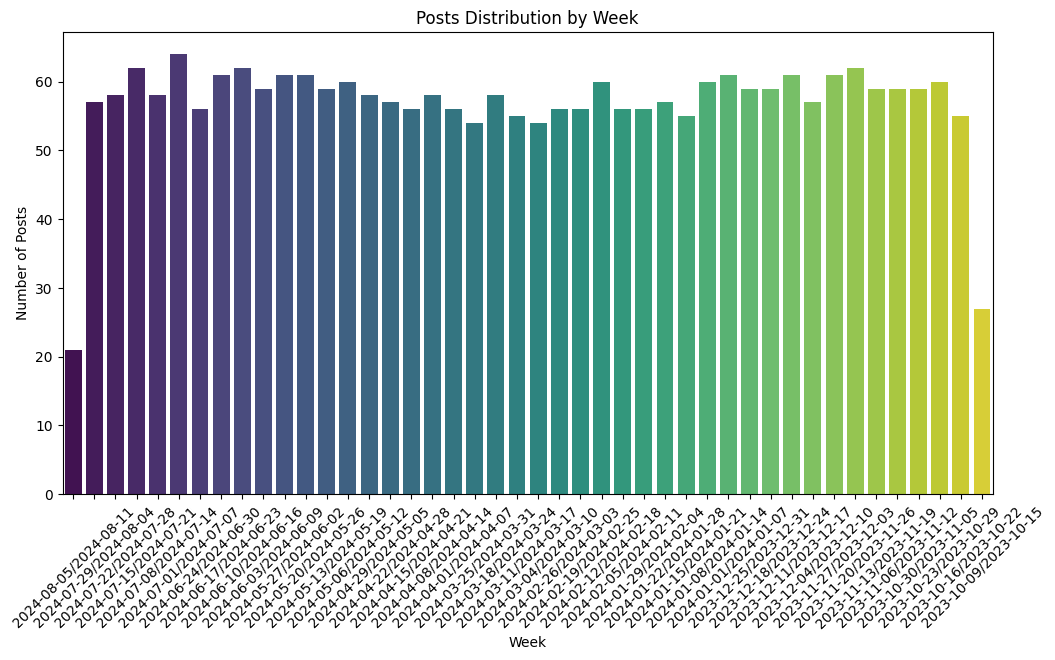

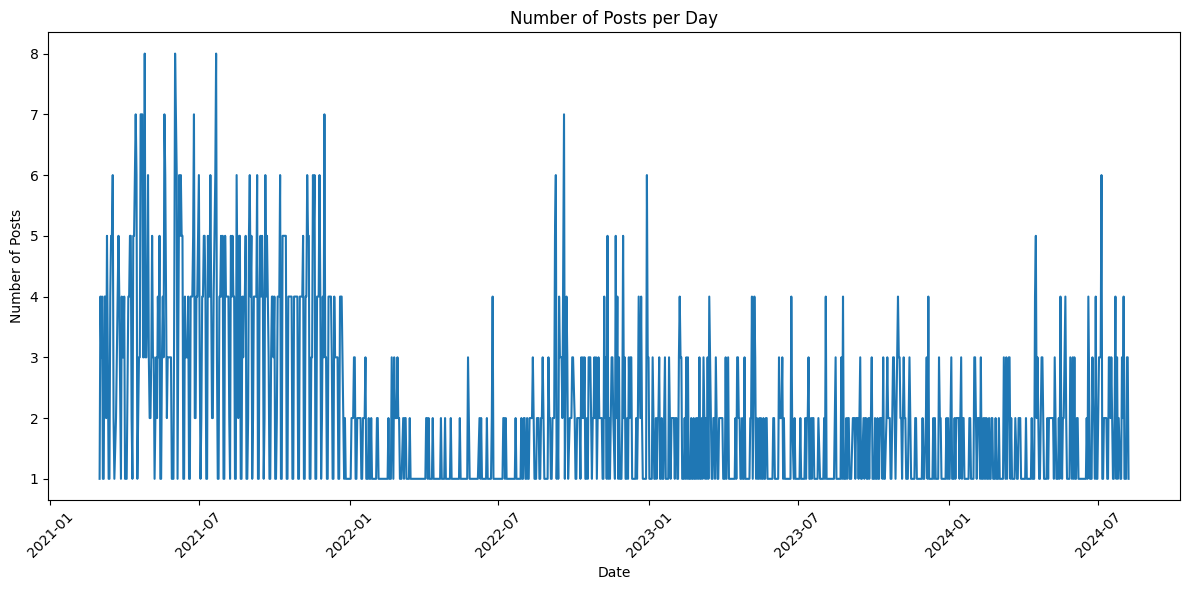

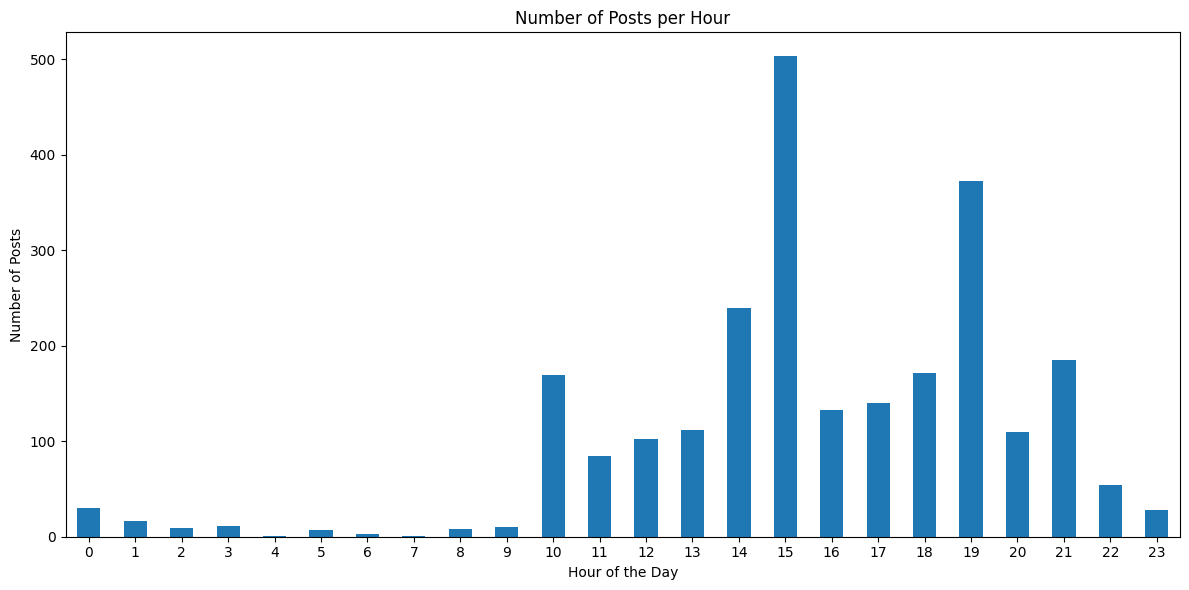

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\966440503.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


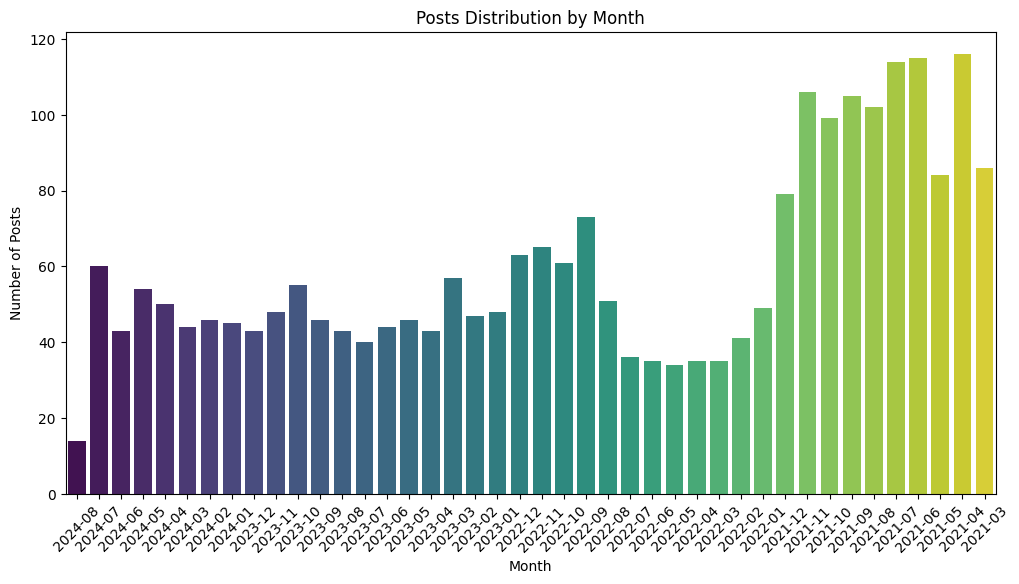

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\966440503.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='week', palette='viridis')


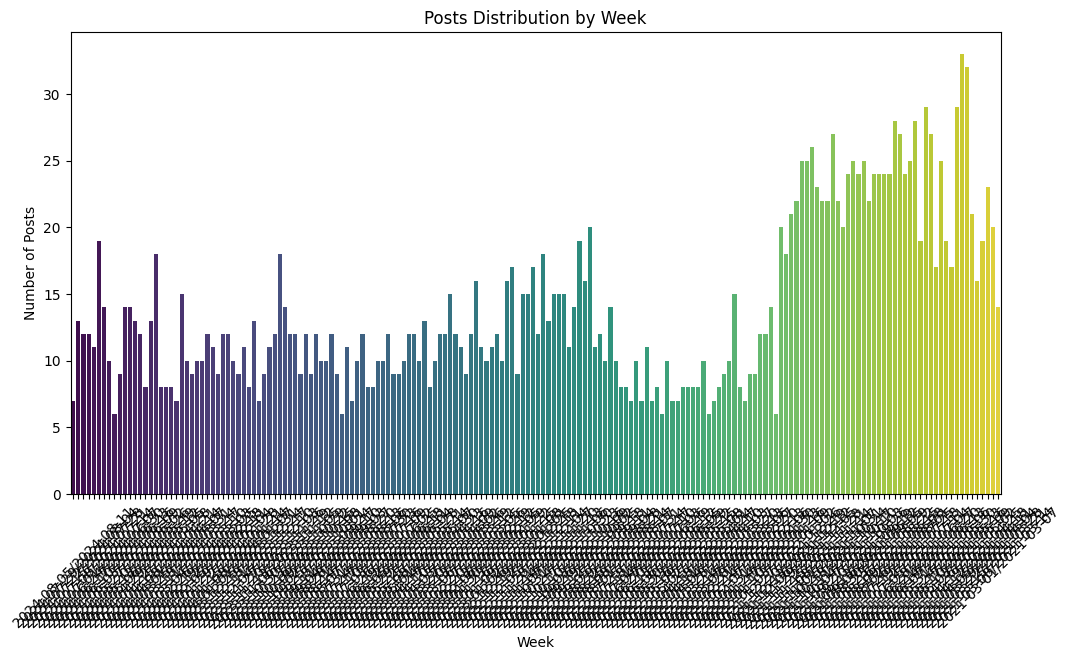

In [11]:
# Function to perform EDA
def perform_eda(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    if 'timestamp' not in df.columns:
        print(f"'timestamp' column not found in {file_name}")
        return

    # Convert the 'timestamp' column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract date and hour from the timestamp
    df['date'] = df['timestamp'].dt.date
    df['hour'] = df['timestamp'].dt.hour
    df['month'] = df['timestamp'].dt.to_period('M')  # Aggregate by month
    df['week'] = df['timestamp'].dt.to_period('W')  # Aggregate by week

    # Number of posts per day
    posts_per_day = df.groupby('date').size()
    plt.figure(figsize=(12, 6))
    posts_per_day.plot()
    plt.title('Number of Posts per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Number of posts per hour
    posts_per_hour = df.groupby('hour').size()
    plt.figure(figsize=(12, 6))
    posts_per_hour.plot(kind='bar')
    plt.title('Number of Posts per Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Posts distribution by month
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='month', palette='viridis')
    plt.title('Posts Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.show()

    # Posts distribution by week
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='week', palette='viridis')
    plt.title('Posts Distribution by Week')
    plt.xlabel('Week')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
file_name = 'processed_cleaned_theeconomist_posts.csv'
perform_eda(file_name)
file_name = 'processed_cleaned_guardian_posts.csv'
perform_eda(file_name)

# Part 9 - Sentimental Analysis

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\1521721977.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df1, palette='viridis')


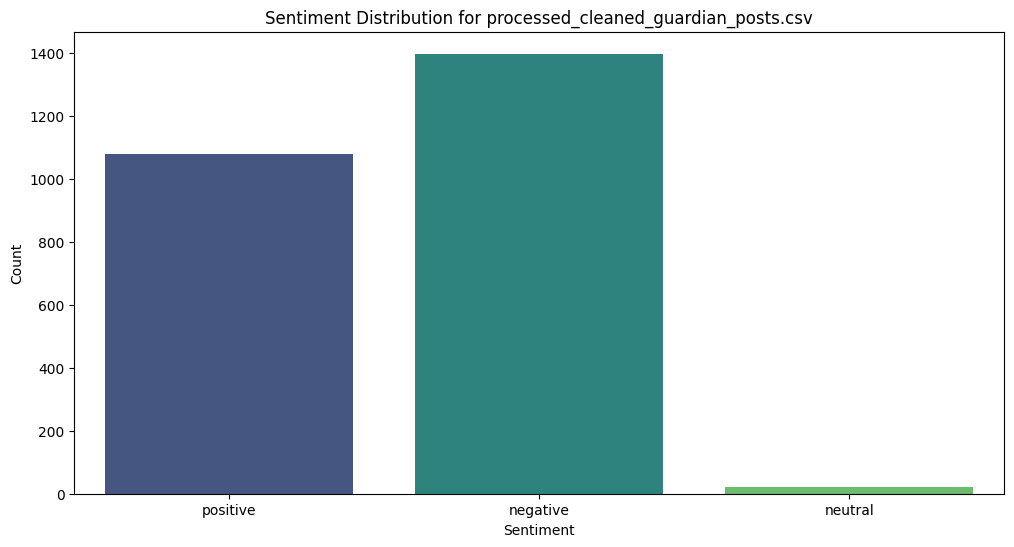

C:\Users\Liran\AppData\Local\Temp\ipykernel_22304\1521721977.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df2, palette='viridis')


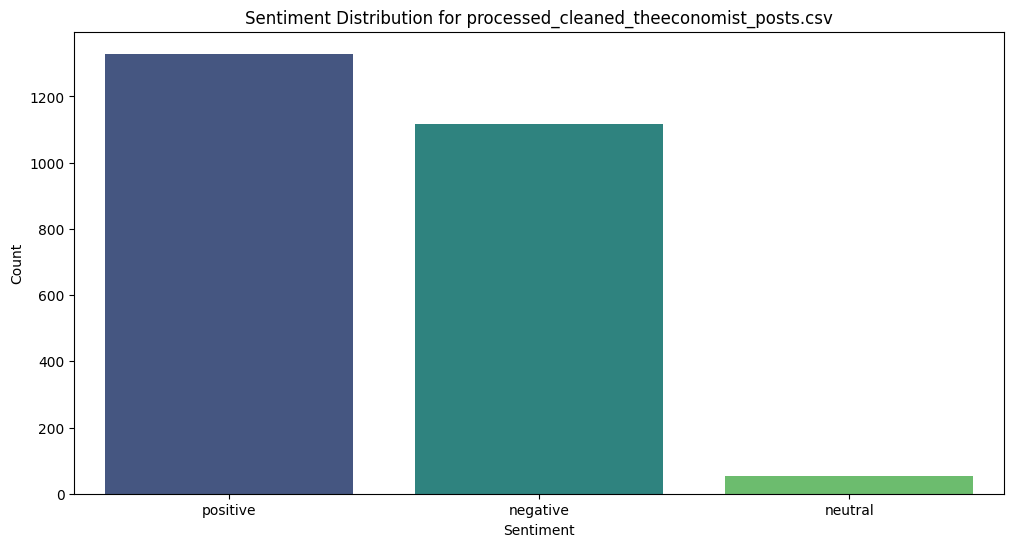

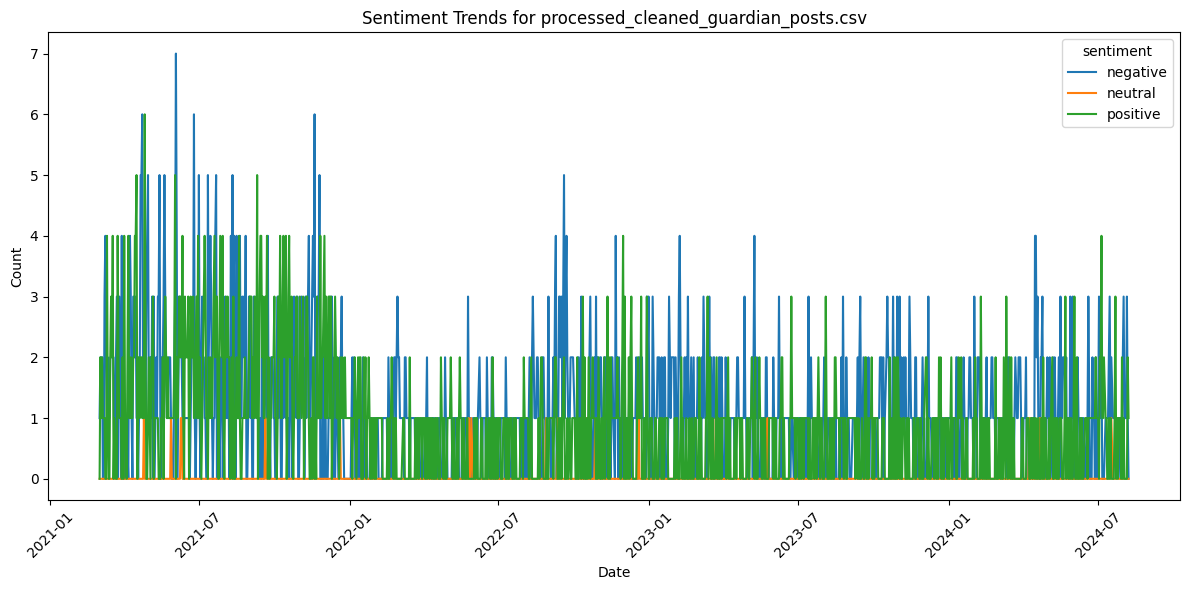

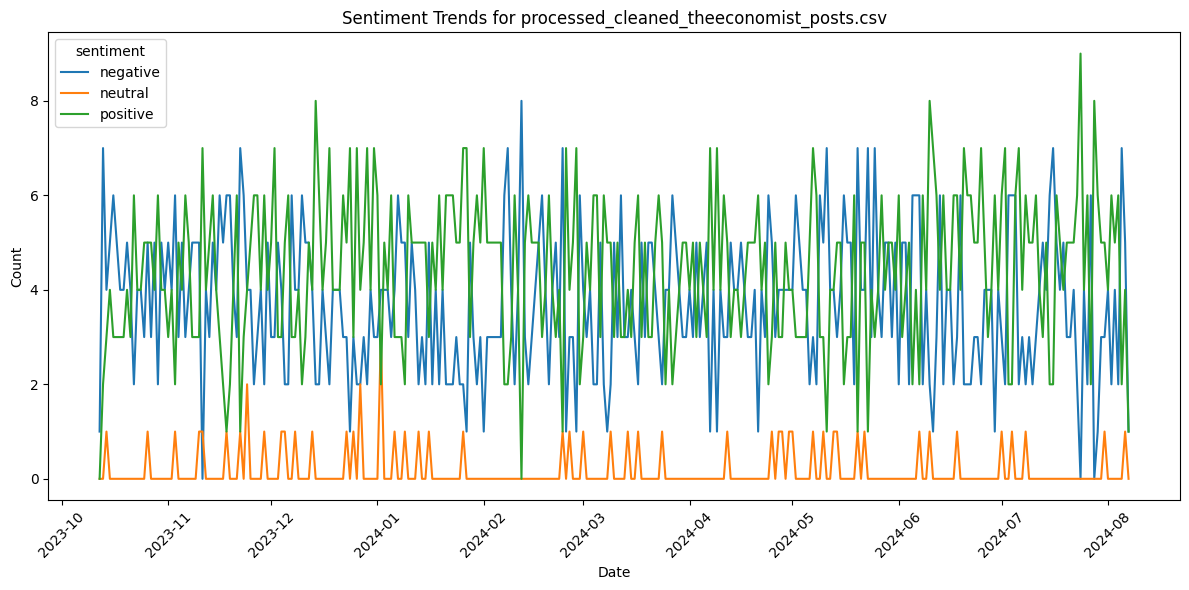

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


# Function to perform sentiment analysis
def sentiment_analysis(df, column):
    sia = SentimentIntensityAnalyzer()
    sentiments = df[column].apply(lambda x: sia.polarity_scores(x)['compound'])
    return sentiments


# Function to categorize sentiments
def categorize_sentiments(sentiments):
    return sentiments.apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


# Function to perform and compare sentiment analysis for two files
def compare_sentiment_analysis(file1, file2):
    # Read the CSV files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Check for 'cleaned_description' column in both files
    if 'cleaned_description' not in df1.columns or 'cleaned_description' not in df2.columns:
        print("'cleaned_description' column not found in one of the files")
        return

    # Perform sentiment analysis
    sentiments1 = sentiment_analysis(df1, 'cleaned_description')
    sentiments2 = sentiment_analysis(df2, 'cleaned_description')

    # Categorize sentiments
    df1['sentiment'] = categorize_sentiments(sentiments1)
    df2['sentiment'] = categorize_sentiments(sentiments2)

    # Plot sentiment distributions
    plt.figure(figsize=(12, 6))
    sns.countplot(x='sentiment', data=df1, palette='viridis')
    plt.title(f'Sentiment Distribution for {file1}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='sentiment', data=df2, palette='viridis')
    plt.title(f'Sentiment Distribution for {file2}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Compare sentiment trends
    df1['date'] = pd.to_datetime(df1['timestamp']).dt.date
    df2['date'] = pd.to_datetime(df2['timestamp']).dt.date

    sentiment_trends1 = df1.groupby(['date', 'sentiment']).size().unstack(fill_value=0)
    sentiment_trends2 = df2.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    sentiment_trends1.plot(kind='line', ax=plt.gca())
    plt.title(f'Sentiment Trends for {file1}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sentiment_trends2.plot(kind='line', ax=plt.gca())
    plt.title(f'Sentiment Trends for {file2}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Example usage
file1 = 'processed_cleaned_guardian_posts.csv'
file2 = 'processed_cleaned_theeconomist_posts.csv'
compare_sentiment_analysis(file1, file2)

# Part 10 - Summarization

In [7]:
import random
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.kl import KLSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"


# Function to perform KL-Sum summarization on a given text
def summarize_text(text):
    parser = PlaintextParser.from_string(text, Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)
    summarizer = KLSummarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    summary = summarizer(parser.document, 1)  # Summarize to 1 sentence

    return ' '.join([str(sentence) for sentence in summary])


# Function to perform summarization and save to a new column
def perform_summarization(file_name):
    # Read the CSV file
    df = pd.read_csv(file_name)

    if 'cleaned_description' not in df.columns:
        print(f"'cleaned_description' column not found in {file_name}")
        return

    # Apply summarization to the 'cleaned_description' column
    df['summarized_description'] = df['cleaned_description'].apply(summarize_text)

    # Save the updated DataFrame to a new CSV file
    output_file_name = 'summarized_' + file_name.split('/')[-1]
    df.to_csv(output_file_name, index=False)
    print(f"Summarized data saved to {output_file_name}")

    return df


# Function to randomly choose 10 statements and show the summarized compared to the original
def show_random_statements(df, file_name):
    random_statements = df.sample(n=10)
    print(f"\nRandomly chosen statements from {file_name}:")
    for i, row in random_statements.iterrows():
        original = row['cleaned_description']
        summarized = row['summarized_description']
        print(f"\nOriginal Statement {i + 1}: {original}")
        print(f"Summarized Statement {i + 1}: {summarized}")


# Function to perform summarization on two files
def summarize_two_files(file1, file2):
    df1 = perform_summarization(file1)
    df2 = perform_summarization(file2)

    if df1 is not None:
        show_random_statements(df1, file1)
    if df2 is not None:
        show_random_statements(df2, file2)

summarize_two_files(file1, file2)

Summarized data saved to summarized_processed_cleaned_guardian_posts.csv
Summarized data saved to summarized_processed_cleaned_theeconomist_posts.csv

Randomly chosen statements from processed_cleaned_guardian_posts.csv:

Original Statement 1106: Putin has just formally annexed the occupied territories of Ukraine in four regions Donetsk Luhansk Kherson and Zaporizhzhia  marking the largest forcible takeover of territory in Europe since the second world war

How did this happen It started when Russia held fake referendums over the last week in order to claim a mandate for the territorial claims which Ukrainians have described as a vote held at gunpoint

Why is Putin doing this Analysts say that Russia is carrying out these annexations as an attempt to halt Ukraines recent successful counterattack

By declaring these territories to be part of Russia Moscow is threatening an overwhelming response including a possible nuclear attack as a part of a defensive war unless Ukraine halts its suc

# Part 11 - RNN for creation of text

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Function to train RNN and generate text
def train_and_generate_text(file_name, num_statements=10):
    # Read the CSV file
    df = pd.read_csv(file_name)

    if 'cleaned_description' not in df.columns:
        print(f"'cleaned_description' column not found in {file_name}")
        return

    # Assume cleaned_description column is a list of strings, each string being a message or a line of text
    cleaned_descriptions = df['cleaned_description'].dropna().tolist()

    # Tokenize the text
    test_texts = cleaned_descriptions[:3]  # Take the first 3 messages as test seeds
    cleaned_descriptions = cleaned_descriptions[3:]
    tokenizer = Tokenizer(num_words=5000)  # Limit to top 5000 words
    tokenizer.fit_on_texts(cleaned_descriptions)
    total_words = min(5000, len(tokenizer.word_index) + 1)

    # Create input sequences and output words
    input_sequences = []
    for line in cleaned_descriptions:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i + 1]
            input_sequences.append(n_gram_sequence)

    # Pad sequences
    max_sequence_len = max([len(seq) for seq in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # Create predictors and label
    X, y = input_sequences[:, :-1], input_sequences[:, -1]

    # Convert y to one-hot encoding
    y = tf.keras.utils.to_categorical(y, num_classes=total_words)

    # Define and compile the RNN model
    rnn_model = Sequential([
        Input(shape=(max_sequence_len - 1,)),
        Embedding(total_words, 8),  # Reduce embedding dimension
        SimpleRNN(16, activation='tanh'),  # Reduce RNN units
        Dense(total_words, activation='softmax')
    ])

    rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the RNN model
    rnn_model.fit(X, y, epochs=10, validation_split=0.1, batch_size=32, verbose=1)  # Reduce epochs and set batch size

    # Function to generate text
    def generate_text(seed_text, next_words, model, max_sequence_len):
        for _ in range(next_words):
            token_list = tokenizer.texts_to_sequences([seed_text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            predicted = model.predict(token_list, verbose=0)
            predicted = np.argmax(predicted, axis=-1)
            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted:
                    output_word = word
                    break
            seed_text += " " + output_word
        return seed_text

    # Generate 10 statements
    generated_statements = []
    for i in range(num_statements):
        seed = ' '.join(test_texts[i % len(test_texts)].split()[:3])  # Use first 3 words of each message as seed
        generated_statement = generate_text(seed, 5, rnn_model, max_sequence_len)
        generated_statements.append(generated_statement)
        print(f"Generated Statement {i + 1}: {generated_statement}")

    return generated_statements


file_name = 'processed_cleaned_theeconomist_posts.csv'
generated_statements = train_and_generate_text(file_name, 10)

Epoch 1/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 343s 46ms/step - accuracy: 0.0781 - loss: 6.6659 - val_accuracy: 0.1509 - val_loss: 5.9302
Epoch 2/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 351s 49ms/step - accuracy: 0.1519 - loss: 5.8678 - val_accuracy: 0.1700 - val_loss: 5.7303
Epoch 3/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 352s 50ms/step - accuracy: 0.1701 - loss: 5.6672 - val_accuracy: 0.1767 - val_loss: 5.6423
Epoch 4/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 353s 50ms/step - accuracy: 0.1781 - loss: 5.5606 - val_accuracy: 0.1783 - val_loss: 5.6143
Epoch 5/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 345s 48ms/step - accuracy: 0.1841 - loss: 5.4846 - val_accuracy: 0.1842 - val_loss: 5.5550
Epoch 6/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 387s 54ms/step - accuracy: 0.1887 - loss: 5.4256 - val_accuracy: 0.1884 - val_loss: 5.5301
Epoch 7/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 429s 60ms/step - accuracy: 0.1901 - loss: 5.3812 - val_accuracy: 0.1929 - val_loss: 5.4874
Epoch 8/10
7107/7107 ━━━━━━━━━━━━━━━━━━━━ 402s 57ms/step - accuracy: 

# Part 12 - GPT for creation of text

In [9]:
import os
import pandas as pd
import torch
import tempfile
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"


# Function to fine-tune GPT-2 and generate text
def fine_tune_gpt2(file_name, num_statements):
    # Read the CSV file
    df = pd.read_csv(file_name)

    if 'cleaned_description' not in df.columns:
        print(f"'cleaned_description' column not found in {file_name}")
        return

    # Use a subset of the dataset for faster training
    cleaned_descriptions = df['cleaned_description'].dropna().tolist()[:5000]

    # Save cleaned descriptions to a text file for training
    with open("train_data.txt", "w", encoding="utf-8") as f:
        for line in cleaned_descriptions:
            f.write(line + "\n")

    # Load pre-trained distilGPT-2 model and tokenizer
    model_name = 'gpt2'
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token

    model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

    # Create TextDataset with a smaller block size for faster training
    train_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path="train_data.txt",
        block_size=32  # Adjust block size
    )

    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=False,
    )

    # Use a temporary directory for output
    with tempfile.TemporaryDirectory() as tmpdirname:
        # Training arguments
        training_args = TrainingArguments(
            output_dir=tmpdirname,  # Temporary directory for output
            overwrite_output_dir=True,
            num_train_epochs=1,  # Reduce epochs
            per_device_train_batch_size=8,  # Reduce batch size if memory is an issue
            save_steps=40_000,  # Save less frequently
            save_total_limit=1,  # Save only the final model checkpoint
            fp16=True,  # Enable mixed precision training
            learning_rate=5e-5,  # Adjust learning rate
            max_steps=100  # Limit to 500 steps
        )

        # Initialize Trainer
        trainer = Trainer(
            model=model,
            args=training_args,
            data_collator=data_collator,
            train_dataset=train_dataset,
        )

        # Fine-tune the model
        trainer.train()

    # Function to generate text with top-k and top-p sampling
    def generate_text(prompt, num_sequences):
        inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_new_tokens=25,  # Generate up to 50 new tokens
            num_return_sequences=num_sequences,
            do_sample=True,  # Enable sampling
            top_k=50,  # Top-K sampling
            top_p=0.95,  # Top-P (nucleus) sampling
            no_repeat_ngram_size=2,
            early_stopping=True
        )
        generated_texts = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
        generated_outputs = [text[len(prompt):].strip() for text in generated_texts]
        return generated_outputs

    # Generate statements
    seed_texts = cleaned_descriptions[:3]  # Use first 3 cleaned descriptions as seeds
    generated_statements = []
    for seed in seed_texts:
        generated_texts = generate_text(seed, num_statements // len(seed_texts))
        generated_statements.extend(generated_texts)

    for i, statement in enumerate(generated_statements):
        print(f"Generated Statement {i + 1}: {statement}")

    return generated_statements


# Usage
file_name = 'processed_cleaned_guardian_posts.csv'
num_statements = 10
generated_statements = fine_tune_gpt2(file_name, num_statements)


C:\Users\Liran\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Liran\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\Liran\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\data\datasets\language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs


Step,Training Loss


C:\Users\Liran\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\generation\configuration_utils.py:615: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Statement 1: is expected to change by around 10 am
For any of the election  we can confirm this is not a good move Kam
Generated Statement 2: on Harris poll
The polling system is so glitchy with a very poor quality evidence that will only be considered when the media
Generated Statement 3: coverage and news flashpoints in the election
   read more by David Lewis
Generated Statement 4: As he explains it is to him he is a natural born leader We are an independent activist leader and candidate for governor He
Generated Statement 5: And when the Republican candidate told him what he was going to say you got him outta the attention
Watz in
Generated Statement 6: He is the one of six men from across the country who have endorsed the Democratic presidential candidate who recently emerged as one more
Generated Statement 7: Kimberly is expected to hold off her Olympic medal in an impressive performance
In a statement the boxer said her boxing performance
Generated Statement 8: Lin Khe

# Part 13 - Comparison
You can see that sentences created by GPT are more gramatically correct and coherent than the ones made by RNN, Additionally it seems like sentences created by GPT has more contextal understanding meanwhile sentences created by RNN seem quite random.

Also, to us it seems that most of the RNN sentences are quite the same, some of them being almost completely identical, while GPT have much more diversity in its generated sentences.